<a href="https://colab.research.google.com/github/Jaahnavi5666/Breast-Cancer-Image-Classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Processing

In [4]:
# Data paths
train_data_dir = '/content/drive/MyDrive/20EE10033_A2/Dataset2/FNA'
test_data_dir = '/content/drive/MyDrive/20EE10033_A2/Dataset2/test'

# Parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 10
batch_size = 32

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1380 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


## CNN

In [5]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callback for saving the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint]
)

Epoch 1/10
43/43 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.8123
Epoch 1: val_accuracy improved from -inf to 0.77812, saving model to best_model.h5
43/43 [==============================] - 276s 6s/step - loss: 0.4838 - accuracy: 0.8123 - val_loss: 0.5738 - val_accuracy: 0.7781
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - ETA: 0s - loss: 0.3061 - accuracy: 0.8917
Epoch 2: val_accuracy did not improve from 0.77812
43/43 [==============================] - 56s 1s/step - loss: 0.3061 - accuracy: 0.8917 - val_loss: 0.5759 - val_accuracy: 0.7312
Epoch 3/10
43/43 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9092
Epoch 3: val_accuracy did not improve from 0.77812
43/43 [==============================] - 57s 1s/step - loss: 0.2748 - accuracy: 0.9092 - val_loss: 0.5856 - val_accuracy: 0.7500
Epoch 4/10
43/43 [==============================] - ETA: 0s - loss: 0.2425 - accuracy: 0.9169
Epoch 4: val_accuracy did not improve from 0.77812
43/43 [==============================] - 56s 1s/step - loss: 0.2425 - accuracy: 0.9169 - val_loss: 0.5369 - val_accuracy: 0.7781
Epoch 5/10
43/43 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.9214
Epoch 5: val_accuracy did not improve from 0.77812
43/43 [==============================] - 56s

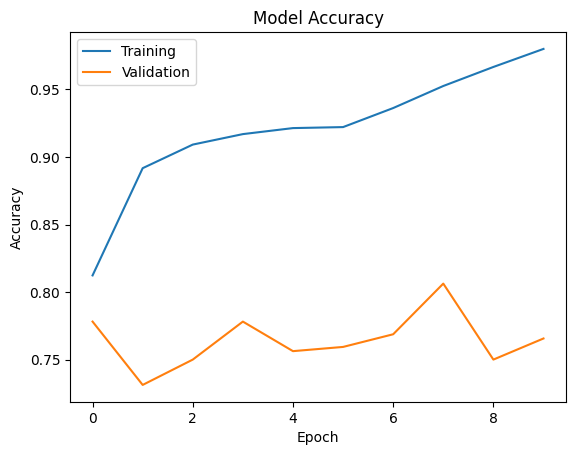

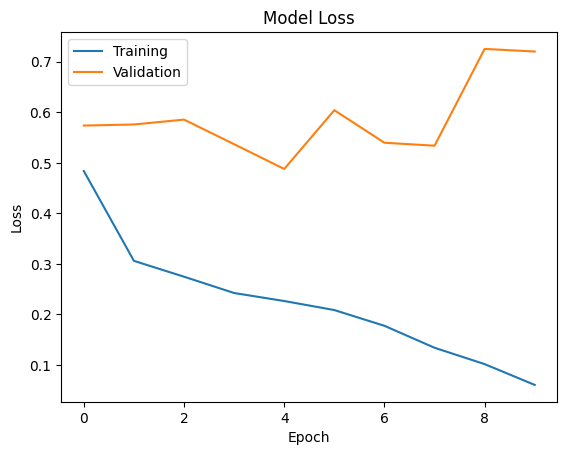

In [6]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Load the best model
model.load_weights('best_model.h5')

## Testing

In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the test dataset
test_data_dir = '/content/drive/MyDrive/20EE10033_A2/Dataset2/test'

# Get the list of image filenames
test_image_filenames = os.listdir(test_data_dir)

# List to store the loaded images
test_images = []

# Load each image using Keras image.load_img and image.img_to_array
for filename in test_image_filenames:
    img_path = os.path.join(test_data_dir, filename)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the pixel values
    test_images.append(img_array)

# Stack the images into a single array
test_images = np.vstack(test_images)

# Predictions
predictions = model.predict(test_images)

# Threshold for classification
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

# Print predicted labels (0 for benign, 1 for malignant)
print("Predicted labels:", predicted_labels)


1/1 [==============================] - 0s 221ms/step
Predicted labels: [[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
